<a href="https://colab.research.google.com/github/Akshayrajnadar/Iris/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris dataset
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Here we are going to make a model which will predict the specised of the Iris flower using the four perameters provided. First we will import all the required libraries and the we will clean the data.

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense , Input
from keras.layers import LSTM
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset

In [ ]:
training_data = pd.read_csv('/content/Iris.csv')

In [ ]:
training_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
training_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
training_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Dividing the dataset
Here we are going to devide the datset into input data and output data or labels. For the input data or X we are going to drop the Species colum and the Id columns and for the output data or Y we will only keep the Species column.

In [ ]:
# X = training_data.drop(['Species'], axis = 1)
# X = X.drop(['Id'], axis = 1)
X = training_data.drop(['Species', 'Id'], axis = 1)

print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


#Making the string to int
In the output data or Y the data is in string format but our model cannot predict it in the srting format so we have to change the data into integer for using map. So, there are total three categories of Iris in this dataset and we will name it as 1 for Iris-setosa, 2 for Iris-versicolor and 3 for Iris-virginica.

In [ ]:
Y = training_data['Species']
Y = Y.map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}).astype(str).astype(int)
# Y["Species"] = Y["Species"].astype(str).astype(int)
# Y = np_utils.to_categorical(training_data['Species'],num_classes=3)
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64


In [ ]:
Y.unique()

array([1, 2, 3])

# Training data and Test data split
Here we will splite the dataset into two parts the traing data which is X_train and Y_train and the testing data which is X_test and Y_test. The data will be splitted in the ratio of 7:3.

In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
Y_train.shape

(105,)

In [ ]:
print(Y_train)

136    3
108    3
42     1
134    3
73     2
      ..
51     2
100    3
125    3
146    3
127    3
Name: Species, Length: 105, dtype: int64


# np_utils.to_categotical
Keras provides numpy utility library, which provides functions to perform actions on numpy arrays. Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [ ]:
Y_train = np_utils.to_categorical(Y_train,num_classes=4)
print(Y_train)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0.

In [ ]:
Y_test = np_utils.to_categorical(Y_test,num_classes=4)

In [ ]:
print(X_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
136            6.3           3.4            5.6           2.4
108            6.7           2.5            5.8           1.8
42             4.4           3.2            1.3           0.2
134            6.1           2.6            5.6           1.4
73             6.1           2.8            4.7           1.2
..             ...           ...            ...           ...
51             6.4           3.2            4.5           1.5
100            6.3           3.3            6.0           2.5
125            7.2           3.2            6.0           1.8
146            6.3           2.5            5.0           1.9
127            6.1           3.0            4.9           1.8

[105 rows x 4 columns]


In [ ]:
print(X_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
50             7.0           3.2            4.7           1.4
1              4.9           3.0            1.4           0.2
88             5.6           3.0            4.1           1.3
142            5.8           2.7            5.1           1.9
12             4.8           3.0            1.4           0.1
0              5.1           3.5            1.4           0.2
111            6.4           2.7            5.3           1.9
31             5.4           3.4            1.5           0.4
10             5.4           3.7            1.5           0.2
68             6.2           2.2            4.5           1.5
96             5.7           2.9            4.2           1.3
20             5.4           3.4            1.7           0.2
143            6.8           3.2            5.9           2.3
77             6.7           3.0            5.0           1.7
58             6.6           2.9            4.6           1.3
129     

# Normalizing Data

In [ ]:
mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(X)

In [ ]:
X_train.shape

(105, 4)

# Model
In this model we are having 4 neurons in the input layer and the are total of 4 hidden layers each containing 50 neurons and relu activattion function and out final layer or the output layer contain 3 neurons with sigmoid as activation function.

In [ ]:
model = models.Sequential()
model.add(Input( shape=[4,]))

model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(4, activation='sigmoid'))

# Compile the model
For compiling the model we are going to use adam optimizer and categorical_crossentopy as loss function.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model


In [ ]:
history = model.fit(X_train, Y_train, epochs=200,
          validation_data=(X_test, Y_test))

Epoch 1/200
4/4 [==============================] - 5s 146ms/step - loss: 1.4331 - accuracy: 0.3524 - val_loss: 1.3125 - val_accuracy: 0.2889
Epoch 2/200
4/4 [==============================] - 0s 26ms/step - loss: 1.2550 - accuracy: 0.3619 - val_loss: 1.2075 - val_accuracy: 0.3333
Epoch 3/200
4/4 [==============================] - 0s 23ms/step - loss: 1.1519 - accuracy: 0.3524 - val_loss: 1.1228 - val_accuracy: 0.2889
Epoch 4/200
4/4 [==============================] - 0s 41ms/step - loss: 1.0683 - accuracy: 0.3524 - val_loss: 1.0711 - val_accuracy: 0.2889
Epoch 5/200
4/4 [==============================] - 0s 22ms/step - loss: 1.0154 - accuracy: 0.3619 - val_loss: 1.0093 - val_accuracy: 0.3111
Epoch 6/200
4/4 [==============================] - 0s 28ms/step - loss: 0.9701 - accuracy: 0.4571 - val_loss: 0.9659 - val_accuracy: 0.4444
Epoch 7/200
4/4 [==============================] - 0s 22ms/step - loss: 0.9384 - accuracy: 0.6286 - val_loss: 0.9141 - val_accuracy: 0.6667
Epoch 8/200
4/4 [==

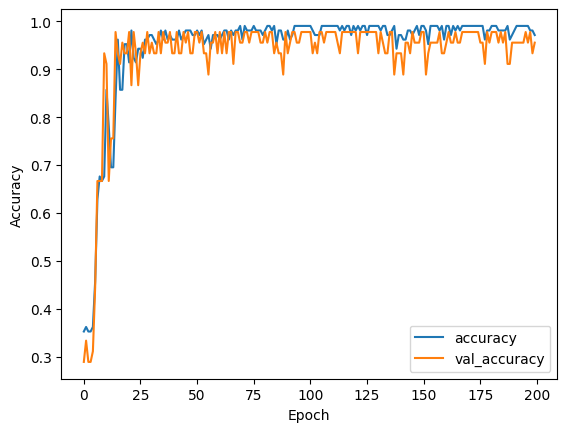

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

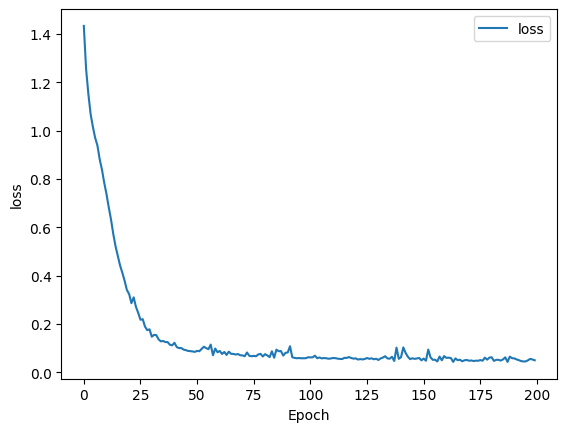

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')